# Aprendizaje no Automático
* Sistemas expertos, por ejemplo los _score cards_ usados para otorgar créditos antes de uso masivo de las computadoras.

Tomemos por ejemplo los datos de [https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)](https://archive.ics.uci.edu/ml/datasets/Statlog+\(German+Credit+Data\)).  Exploremos su contenido:


In [1]:
!head data/german.data

A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 22 A143 A152 1 A173 1 A191 A201 2
A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 49 A143 A152 1 A172 2 A191 A201 1
A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 45 A143 A153 1 A173 2 A191 A201 1
A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 53 A143 A153 2 A173 2 A191 A201 2
A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 35 A143 A153 1 A172 2 A192 A201 1
A14 24 A32 A42 2835 A63 A75 3 A93 A101 4 A122 53 A143 A152 1 A173 1 A191 A201 1
A12 36 A32 A41 6948 A61 A73 2 A93 A101 2 A123 35 A143 A151 1 A174 1 A192 A201 1
A14 12 A32 A43 3059 A64 A74 2 A91 A101 4 A121 61 A143 A152 1 A172 1 A191 A201 1
A12 30 A34 A40 5234 A61 A71 4 A94 A101 2 A123 28 A143 A152 2 A174 1 A191 A201 2


* ¿Qué significan todas estas claves?
* ¿Qué hacemos cuando tenemos este tipo de datos?
* ¿Se pueden usar histogramas?

La descripción de los datos viene en el archivo `data/german.doc`

In [2]:
!head data/german.doc

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  


**Por favor, leánla en detalle al finalizar la sesión.**

## Score cards  
**¿Cómo comenzamos a usar la información contenida en los datos?**  
* Necesitamos saber qué significa cada columna,  
* Ponerlos en un formato analizable,  
* Comenzar a hacer algunos histogramas,  

**Por ahora yo hice un trabajo previo para ponerles nombres a las columnas, y estructurarlos de forma que no sean útiles. Es tarea para ustedes hacer su propio script que tome el archivo original y lo convierta en en un archivo similar al siguiente:**

In [3]:
!head data/german.data.all-numeric.csv

"checking_acc_numeric","time_credit_acc","credit_history_numeric","purpose_numeric","amount","savings_acc_numeric","p_employment_time_numeric","installment_rate","marita_status_sex_numeric","other_debtors_numeric","p_residence_time","property_numeric","age","other_installment_numeric","housing_numeric","number_of_credits","job_numeric","dependants","has_phone_numeric","foreign_worker_numeric","is_good"
1,6,3,1,1169,0,5,4,1,1,4,4,67,0,1,2,3,1,1,1,1
2,48,4,1,5951,1,3,2,2,1,2,4,22,0,1,1,3,1,0,1,2
4,12,3,6,2096,1,4,2,1,1,3,4,49,0,1,1,2,2,0,1,1
1,42,4,3,7882,1,4,2,1,2,4,3,45,0,0,1,3,2,0,1,1
1,24,2,2,4870,1,3,3,1,1,4,0,53,0,0,2,3,2,0,1,2
4,36,4,6,9055,0,3,2,1,1,4,0,35,0,0,1,2,2,1,1,1
4,24,4,3,2835,3,5,3,1,1,4,3,53,0,1,1,3,1,0,1,1
2,36,4,4,6948,1,3,2,1,1,2,2,35,0,2,1,4,1,1,1,1
4,12,4,1,3059,4,4,2,4,1,4,4,61,0,1,1,2,1,0,1,1


Por supuesto, ustedes prefieren usar `pandas` para visualizarlos. 

In [4]:
from pandas import read_csv as read_csv
df = read_csv('data/german.data.all-numeric.csv',header=0)
df.head(n=10)

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,property_numeric,age,other_installment_numeric,housing_numeric,number_of_credits,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good
0,1,6,3,1,1169,0,5,4,1,1,...,4,67,0,1,2,3,1,1,1,1
1,2,48,4,1,5951,1,3,2,2,1,...,4,22,0,1,1,3,1,0,1,2
2,4,12,3,6,2096,1,4,2,1,1,...,4,49,0,1,1,2,2,0,1,1
3,1,42,4,3,7882,1,4,2,1,2,...,3,45,0,0,1,3,2,0,1,1
4,1,24,2,2,4870,1,3,3,1,1,...,0,53,0,0,2,3,2,0,1,2
5,4,36,4,6,9055,0,3,2,1,1,...,0,35,0,0,1,2,2,1,1,1
6,4,24,4,3,2835,3,5,3,1,1,...,3,53,0,1,1,3,1,0,1,1
7,2,36,4,4,6948,1,3,2,1,1,...,2,35,0,2,1,4,1,1,1,1
8,4,12,4,1,3059,4,4,2,4,1,...,4,61,0,1,1,2,1,0,1,1
9,2,30,3,2,5234,1,1,4,3,1,...,2,28,0,1,2,4,1,0,1,2


En este caso se tienen 20 columnas de características o discriminadores (_features_), y una columna de salida o clasificación. Tomemos sólo 4 de las 20 características para ilustrar el proceso de creación de un _score card_. En este caso tomaremos:  
* `time_credit_acc`
* `amount`
* `p_employment_time_numeric`
* `age`

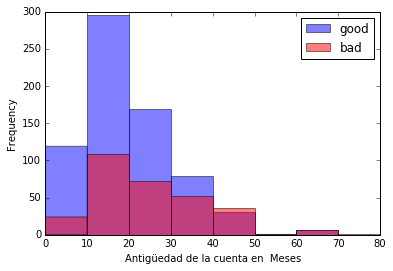

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure();
tca_range = range(0,90,10)
df_good = df[df['is_good']==1] 
df_bad = df[df['is_good']!=1]
df_good['time_credit_acc'].plot.hist(bins=tca_range,color='b',alpha=0.5,label='good')
df_bad['time_credit_acc'].plot.hist(bins=tca_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper right')
plt.xlabel('Antigüedad de la cuenta en meses')

